In [1]:
# from jupyterthemes import jtplot
# jtplot.style()

# House Prices 
Data set is [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import os
TRAIN_PATH = 'datasets/house_price'
TEST_PATH = 'datasets/house_price'
def load_houses_data(TRAIN_PATH=TRAIN_PATH, TEST_PATH=TEST_PATH):
    train_csv = os.path.join(TRAIN_PATH, 'train.csv')
    test_csv = os.path.join(TEST_PATH, 'test.csv')
    return pd.read_csv(train_csv), pd.read_csv(test_csv)

In [3]:
X_train, X_test = load_houses_data()
y_train = X_train['SalePrice']
y_train_first = y_train

In [4]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
X_train.std()

Id                 421.610009
MSSubClass          42.300571
LotFrontage         24.284752
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
MasVnrArea         181.066207
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageYrBlt         24.689725
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea  

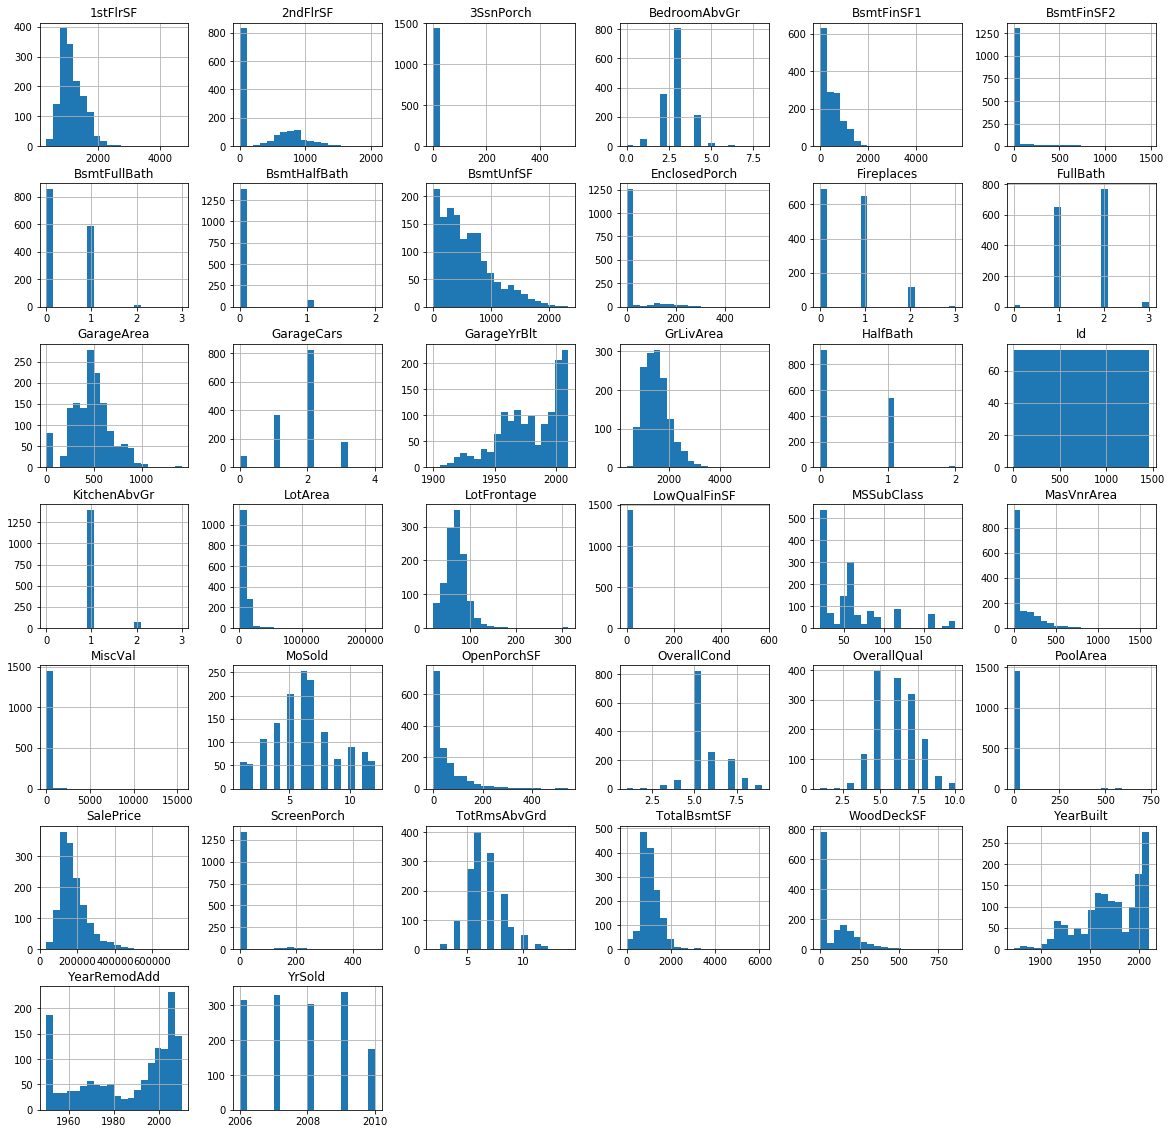

In [7]:
X_train.hist(figsize=(20, 20), bins=20)
plt.show()

In [8]:
X_train['3SsnPorch'].describe()

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

In [9]:
np.unique(X_train['BedroomAbvGr'].values)

array([0, 1, 2, 3, 4, 5, 6, 8])

In [10]:
X_train.groupby('BedroomAbvGr').count()['Id']

BedroomAbvGr
0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: Id, dtype: int64

In [11]:
X_train.groupby('BsmtFullBath').count()['Id']

BsmtFullBath
0    856
1    588
2     15
3      1
Name: Id, dtype: int64

In [12]:
X_train[['TotalBsmtSF', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF']].head()

,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF
0,856,0,706,150
1,1262,0,978,284
2,920,0,486,434
3,756,0,216,540
4,1145,0,655,490


In [13]:
X_train[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].describe()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,46.660274,21.954110,3.409589,15.060959
std,66.256028,61.119149,29.317331,55.757415
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000
75%,68.000000,0.000000,0.000000,0.000000
max,547.000000,552.000000,508.000000,480.000000


In [14]:
X_train[['GarageType']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
GarageType    1379 non-null object
dtypes: object(1)
memory usage: 11.5+ KB


In [15]:
X_train.groupby('GarageFinish').count()['Id'] # Let it be in our dataset

GarageFinish
Fin    352
RFn    422
Unf    605
Name: Id, dtype: int64

In [16]:
X_train.corr()['GarageArea']['GarageCars']

0.8824754142814603

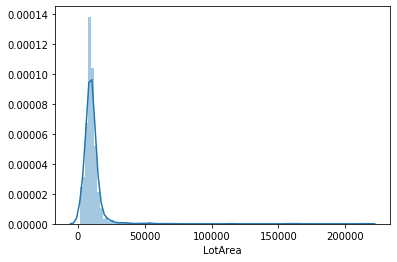

In [17]:
sns.distplot(X_train['LotArea'], bins=100)

In [18]:
X_train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123269f98>]],
      dtype=object)

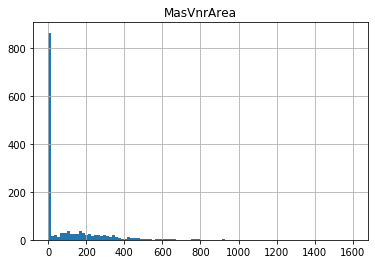

In [19]:
X_train[['MasVnrArea']].hist(bins=100)

* should drop id.
* almost all 3SsnPorch are zero and we can delete it.
* we can group rooms 5 or more into one single column.
* can merge full and half bathrooms into one filed name bathroom
* we can drop two type of finished and have one finished basement feet
* we can change basement unfinished into a fraction of finished/unfinished (It got bad correlation)
* can merge porchs into one field.
* garage year built can be droped and have a single year built for house.
* we could have just garage area between cars and area.
* we cad drop kitchen also. becasue a bunch of them are one.
* can filter Lot Area above 50000 to 50001
* we **can** drop MSSubClass, OverallCond, YrSold, LowQualFinSF, Id, MiscVal, BsmtHalfBath, BsmtFinSF2, 3SsnPorch, MoSold, PoolArea because of their corrolation
* It's not important when it was sold. So we drop MoSold and YrSold.
* Overall Qual is important but Overall cond not!
* We can add a luxury style field to show having pool or not and other fantasy features.
* we can have just one of YearRemodAdd or YearBuilt.


In [20]:
# X_train['HalfBath'] = X_train['HalfBath'].astype(str)

In [21]:
# X_train['OverallQual'] = X_train['OverallQual'].astype(str)

In [22]:
X_train['YrSold'] = X_train['YrSold'].astype(str)
X_train['MoSold'] = X_train['MoSold'].astype(str)

In [23]:
label_attrs = X_train.select_dtypes([object]).columns.values
num_attrs = X_train.select_dtypes([np.int64, np.float64]).columns.values
num_attrs = num_attrs[~(num_attrs == 'SalePrice')]

### Normalize Sale Price


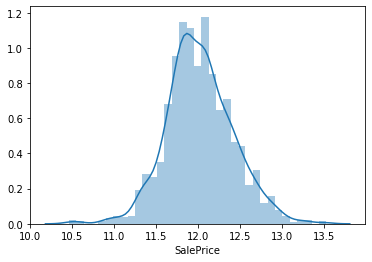

In [24]:
from sklearn.base import TransformerMixin, BaseEstimator
import seaborn as sns
class Normalize(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dataset = y_train.copy()
        dataset = np.log1p(dataset)
        return dataset
y_train = Normalize().transform(y_train)
sns.distplot(y_train)


In [25]:
X_train_label = X_train[label_attrs]
X_train_num = X_train[num_attrs]

In [26]:
from sklearn.preprocessing import StandardScaler
X_train_num_std = pd.DataFrame(StandardScaler().fit_transform(X_train_num), columns=X_train_num.columns)

## Colinearity

In [27]:
cols = X_train_num_std.columns

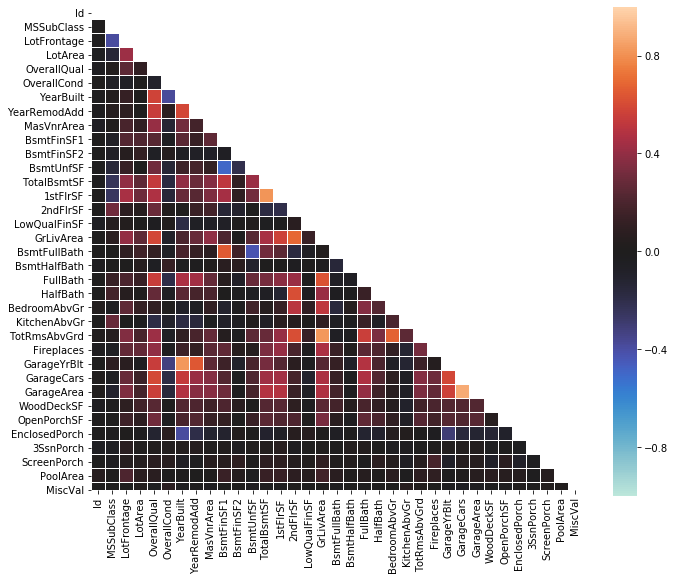

In [28]:
corr = X_train_num_std.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0,vmin=-1 , 
            square=True, linewidths=.005)

Its hard to select from them by eye. so we filter it!

In [29]:
X_train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

* We should drop from orange blocks
* `GarageCars` should remain, and `GarageArea` should be deleted.
* `GrLivArea` should remain, and `BedroomAbvGr` and `TotRmsAbvGrd` should be deleted.
* `TotalBsmtSF` should remain, and `1stFlrSF` should be deleted.
* `YearBuilt` should remain, and `GarageYrBlt` should be deleted.

In [30]:
num_colinear_drop_attrs = ['GarageArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', '1stFlrSF']

## Work With Numbers

### Merge FullBath and HalfBath

In [31]:
class MergeBath(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['Bath'] = X['HalfBath'] * X['FullBath']
        X['HalfBath2'] = X['HalfBath'] ** 2
        X['FullBath2'] = X['FullBath'] ** 2
        X['BsmtBath'] = X['BsmtHalfBath'] * X['BsmtFullBath']
        X['BsmtHalfBath2'] = X['BsmtHalfBath'] ** 2
        X['BsmtFullBath2'] = X['BsmtFullBath'] ** 2
#         X = X.drop(['HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath'], axis=1)
        return X
X_num_merged = MergeBath().transform(X_train_num)

### Merge BsmntFS and add Unfinished Fraction

In [32]:
class MergeBsmntFs(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['BsmtFinSF'] = X['BsmtFinSF1'] * X['BsmtFinSF2']
        X['BsmtFinSF12'] = X['BsmtFinSF1'] ** 2
        X['BsmtFinSF22'] = X['BsmtFinSF2'] ** 2
#         X.drop(['BsmtFinSF1', 'BsmtFinSF2'], axis=1, inplace=True)
        return X
X_num_bsmnt_proved = MergeBsmntFs().transform(X_num_merged)

### Merge Porchs 

In [33]:
# PolynomialFeatures?
class MergePorches(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['Porch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']
        X.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)
        return X
X_num_porch_merged = MergePorches().transform(X_num_bsmnt_proved)

### Filter Lot Area above 50000 and Room above 5

In [34]:
class FilterLotAreaAndRooms(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self;
    def transform(self, X, y=None):
        X = X.copy()
        X['LotArea'] = X['LotArea'].apply(lambda l: 50001 if l > 50000 else l)
        X['BedroomAbvGr'] = X['BedroomAbvGr'].apply(lambda l: 5 if l > 5 else l)
        return X
X_num_lot_filtered = FilterLotAreaAndRooms().transform(X_num_porch_merged)

### Merge Lots


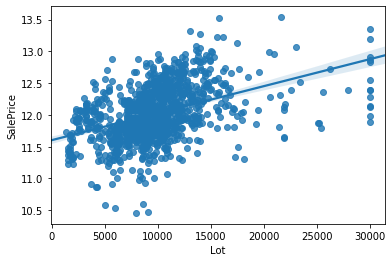

In [57]:
class MergeLots(BaseEstimator, TransformerMixin) :
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X['Lot'] = X['LotArea'] + X['LotFrontage']
        X.drop(['LotArea', 'LotFrontage'], axis=1, inplace=True)
        X['Lot'] = X['Lot'].apply(lambda l: 30000 if l > 30000 else l)
        return X
X_num_lots_merged = MergeLots().transform(X_num_lot_filtered)
sns.regplot(x='Lot', y=y_train, data = X_num_lots_merged)

### Linearing And Removing Outliers

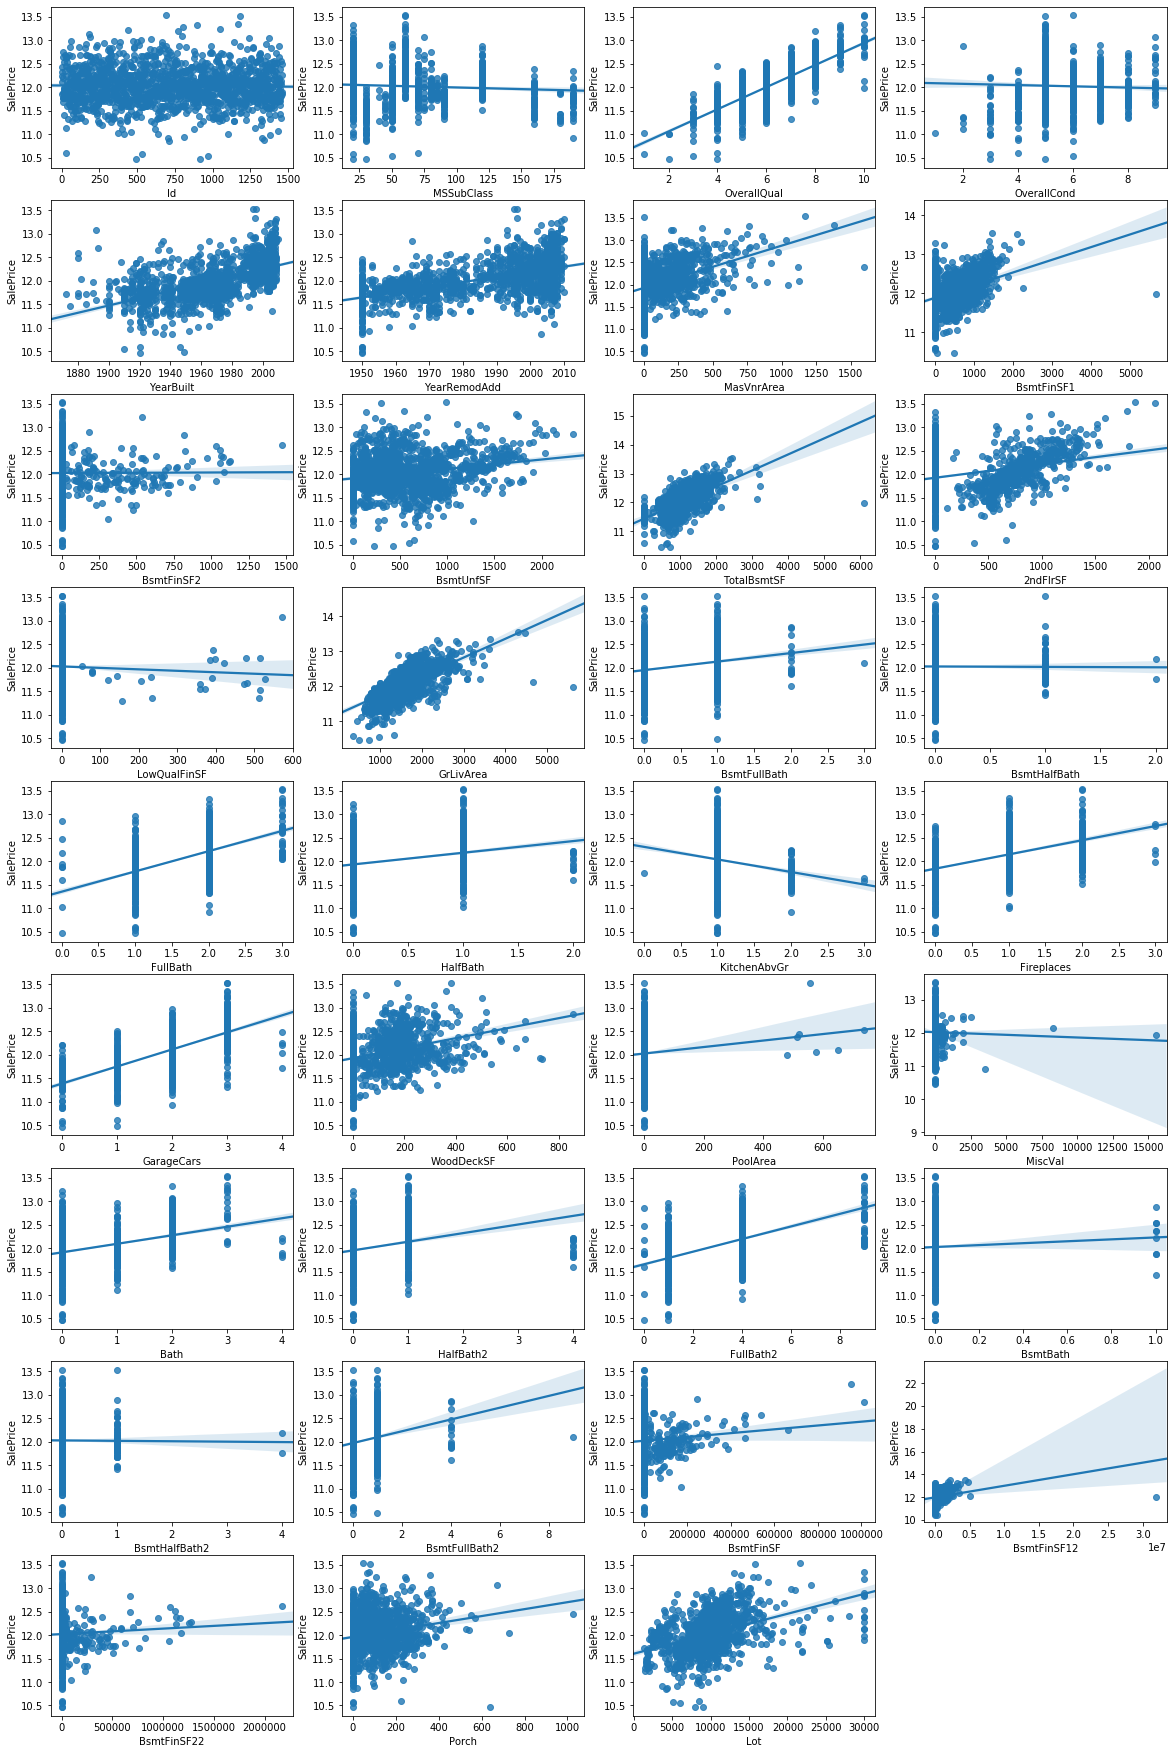

In [61]:
i = 1;
plt.figure(figsize=(20, 35))
for col in X_num_lots_merged.drop(num_colinear_drop_attrs, axis=1):
    if col is not 'Id' and col is not 'SalePrice':
        plt.subplot(10, 4, i)
        sns.regplot(x=col, y=y_train, data=X_num_lots_merged)
        i = i+1

In [62]:
num_scatter_drop = ['MSSubClass', 'LowQualFinSF']

In [63]:
to_delete_outlires = ['GrLivArea', 'OverallCond', 'BsmtFinSF1', 'GarageCars',
                      '2ndFlrSF', 'YearBuilt', 'YearRemodAdd'] #Think about garage cars

In [64]:
from sklearn.impute import SimpleImputer
X_train_num_std_imputed = pd.DataFrame(SimpleImputer().fit_transform(X_train_num_std), 
                                       columns= X_train_num_std.columns)

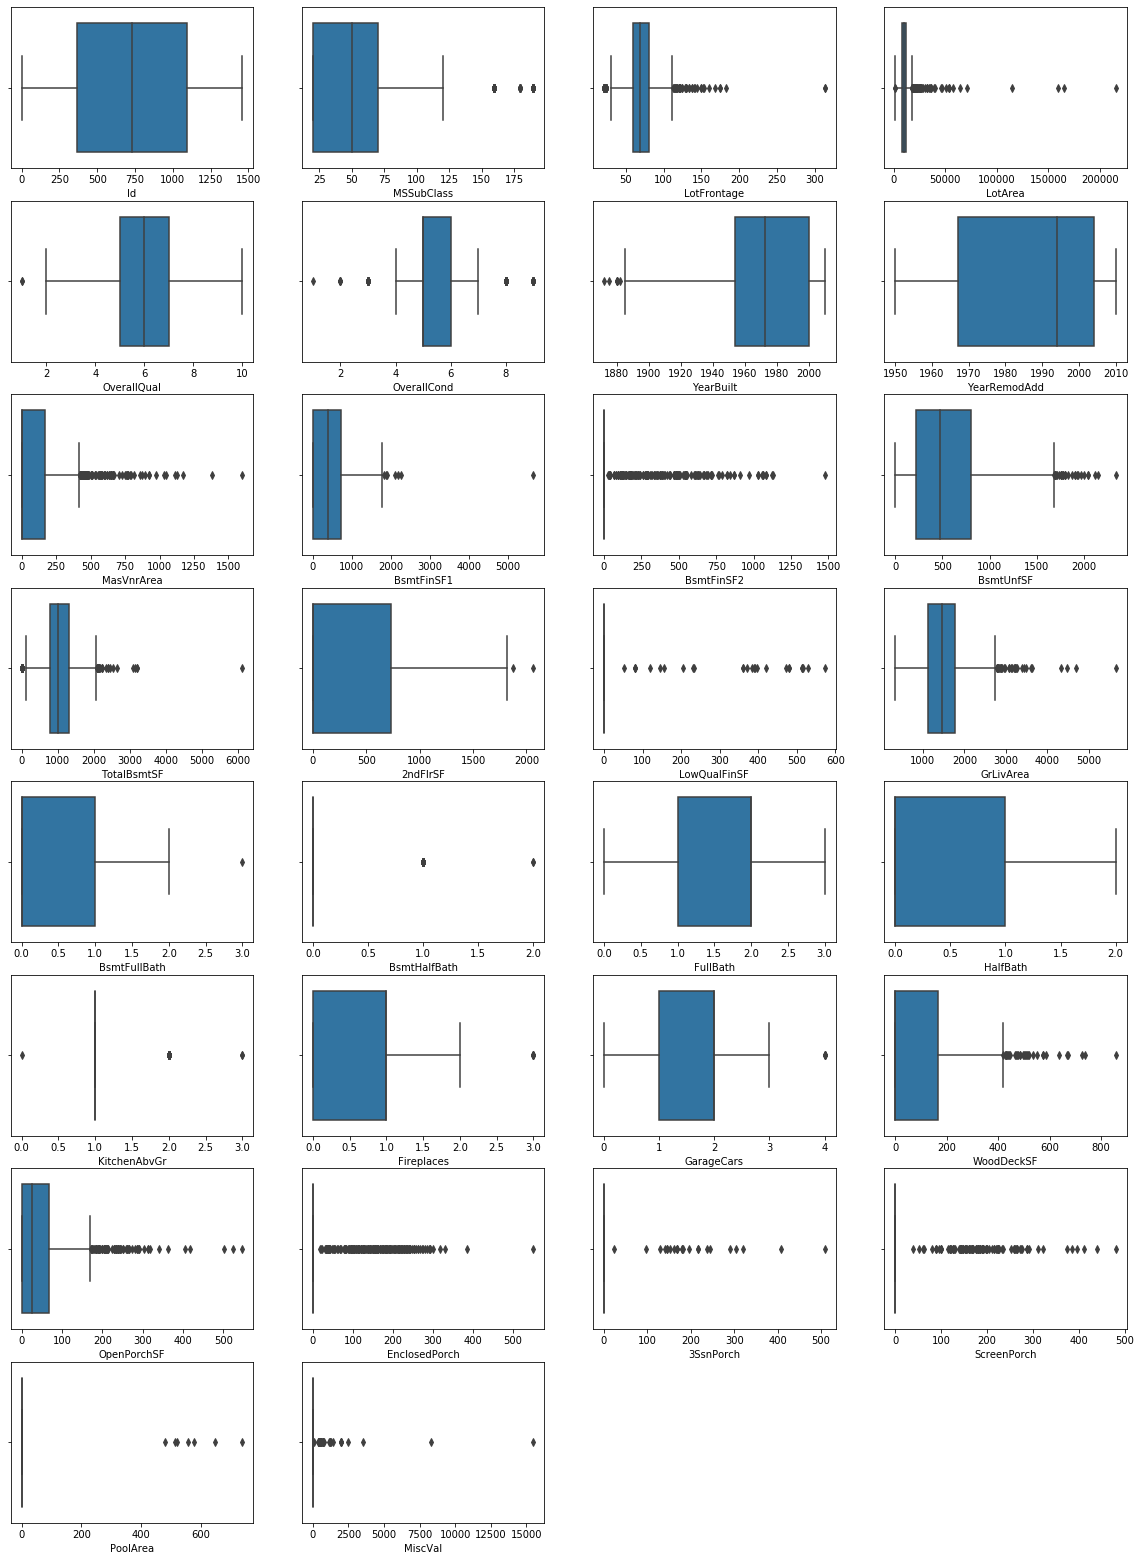

In [65]:
i = 1;
plt.figure(figsize=(20, 35))
for col in X_train_num.drop(num_colinear_drop_attrs, axis=1):
    if col is not 'Id' and col is not 'SalePrice':
        plt.subplot(10, 4, i)
        sns.boxplot(x=X_train[col])
        i = i+1

In [66]:
from scipy import stats
import numpy as np
z = pd.DataFrame(np.abs(stats.zscore(X_train_num)), columns=X_train_num.columns)

In [67]:
X_train.shape

(1460, 81)

In [68]:
X_train_without_outlier = X_train[(z[to_delete_outlires] < 3).all(axis=1)]

In [69]:
y_train_without_outlier = y_train[(z[to_delete_outlires] < 3).all(axis=1)]

In [112]:
X_train_without_outlier.shape

(1411, 81)

In [71]:
# sns.distplot(X_train_num_std_imputed.LotFrontage)

### Dropping 

In [72]:
class DataFrameDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_attrs=[]):
        self.drop_attrs = drop_attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X.drop(self.drop_attrs, axis=1, inplace=True, errors='ignore')
        return X

In [73]:
num_drop_attrs = num_scatter_drop + num_colinear_drop_attrs
# num_scatter_drop_attrs = ['PoolArea','MiscVal',]
# num_drop_attrs = ['Id', 'MSSubClass', 'OverallCond','YrSold', 'LowQualFinSF',
#                   'MoSold', 'YearRemodAdd', 'SalePrice']
X_num_dropped = DataFrameDropper(num_drop_attrs).transform(X_num_lot_filtered)

## Work With Labels

In [74]:
X_train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

### Dropping very null attributes

In [75]:
label_drop_attrs = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] # Think about FireplaceQu
X_label_dropped = DataFrameDropper(label_drop_attrs).transform(X_train_label)

### Impute

In [76]:
from sklearn.impute import SimpleImputer
X_label_imputed = pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(X_label_dropped.values),
                               columns=X_label_dropped.columns)

### Encoding Label

In [77]:
from sklearn.preprocessing import OneHotEncoder
class OneHotGoodEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder()
    def fit(self, X, y=None): 
        self.encoder.fit(X)
    def transform(self, X, y=None):
        columns = X.columns
        X_transformed = self.encoder.transform(X).toarray()
        cats = self.encoder.categories_
        i = 0
        labels = []
        for cat in cats:
            for c in cat:
                labels.append(columns[i] + ' : ' + c)
            i = i+1
        return pd.DataFrame(X_transformed, columns=labels)
            

In [78]:
encoder = OneHotGoodEncoder()
encoder.fit(X_label_imputed)
X_label_encoded = encoder.transform(X_label_imputed)

### Analys labels using p-value


In [79]:
from sklearn.feature_selection import f_regression
F, p_value = f_regression(X_label_encoded, y_train)
np.array(X_label_encoded.columns) + " = " + (p_value < 0.05).astype(str) 

array(['MSZoning : C (all) = True', 'MSZoning : FV = True',
       'MSZoning : RH = True', 'MSZoning : RL = True',
       'MSZoning : RM = True', 'Street : Grvl = True',
       'Street : Pave = True', 'LotShape : IR1 = True',
       'LotShape : IR2 = True', 'LotShape : IR3 = False',
       'LotShape : Reg = True', 'LandContour : Bnk = True',
       'LandContour : HLS = True', 'LandContour : Low = False',
       'LandContour : Lvl = False', 'Utilities : AllPub = False',
       'Utilities : NoSeWa = False', 'LotConfig : Corner = False',
       'LotConfig : CulDSac = True', 'LotConfig : FR2 = False',
       'LotConfig : FR3 = False', 'LotConfig : Inside = True',
       'LandSlope : Gtl = False', 'LandSlope : Mod = False',
       'LandSlope : Sev = False', 'Neighborhood : Blmngtn = False',
       'Neighborhood : Blueste = False', 'Neighborhood : BrDale = True',
       'Neighborhood : BrkSide = True', 'Neighborhood : ClearCr = True',
       'Neighborhood : CollgCr = True', 'Neighborhood : C

If all classes of a category was false we were delete it.

In [80]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, OneHotEncoder, OrdinalEncoder
encoder = OrdinalEncoder()
X_label_encoded = pd.DataFrame(OrdinalEncoder().fit_transform(X_label_imputed), columns=X_label_imputed.columns)

### Analys Labels

In [81]:
X_label_analys = X_label_encoded.copy()
X_label_analys['PriceSale'] = y_train.values

In [82]:
# label_new_drop_attrs = label_drop_attrs + [ 'MSZoning', 'Heating', 'BsmtFinType1', 'BldgType', 'LotConfig', 'SaleType', 'Utilities',
#                          'Condition2', 'LandContour', 'MasVnrType', 'BsmtFinType2', 'Street', 'LandSlope', 'BsmtCond',
#                          'Condition1', 'GarageQual', 'Exterior1st', 'Exterior2nd', 'Functional', 'ExterCond', 'RoofMatl',
#                          'GarageCond', 'HouseStyle']
label_new_drop_attrs = ['Utilities', 'LandSlope', 'YrSold', 'MoSold']
X_label_new_analys = DataFrameDropper(label_new_drop_attrs).transform(X_label_analys)

## Create Pipeline 

In [83]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attrs = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.loc[:, self.attrs]
class LabelBinarizerPipelineFriendly(OneHotEncoder):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly,self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X).toarray()
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)



In [84]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer


num_pipeline = Pipeline([
    ('selection', DataFrameSelector(num_attrs)),
    ('merge_bath', MergeBath()),
    ('merge_bsmnt', MergeBsmntFs()),
    ('merge_porch', MergePorches()),
    ('filter', FilterLotAreaAndRooms()),
    ('drop', DataFrameDropper(num_drop_attrs)),
    ('impute', SimpleImputer()),
    ('std_scale', StandardScaler()),
])

label_pipeline = Pipeline([
    ('selection', DataFrameSelector(label_attrs)),
    ('drop', DataFrameDropper(label_new_drop_attrs)),
    ('impute', SimpleImputer(strategy="most_frequent")),
#     ('encode', OrdinalEncoder()), # one hot is  better 
    ('encode', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('std_scale', StandardScaler()),
])

full_pipeline = FeatureUnion([
    ('num_pipline', num_pipeline),
    ('label_pipeline', label_pipeline),
])


X_train_cleaned = pd.DataFrame(full_pipeline.fit_transform(X_train_without_outlier))

In [85]:
y_train = y_train_without_outlier

In [86]:
X_train_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-1.730383,-0.218857,-0.288373,0.693498,-0.534116,1.056186,0.892129,0.573115,0.640496,-0.292147,...,-0.059634,-0.299291,-0.046159,0.388455,-0.267160,-0.053319,-0.088641,-0.119909,0.461781,-0.303488
1,-1.728011,0.503272,-0.077631,-0.051194,2.432961,0.131759,-0.412271,-0.588816,1.282978,-0.292147,...,-0.059634,-0.299291,-0.046159,0.388455,-0.267160,-0.053319,-0.088641,-0.119909,0.461781,-0.303488
2,-1.725639,-0.074431,0.224737,0.693498,-0.534116,0.987710,0.843818,0.371555,0.120842,-0.292147,...,-0.059634,-0.299291,-0.046159,0.388455,-0.267160,-0.053319,-0.088641,-0.119909,0.461781,-0.303488
3,-1.723267,-0.459567,-0.086794,0.693498,-0.534116,-1.956761,-0.702137,-0.588816,-0.516916,-0.292147,...,-0.059634,-0.299291,-0.046159,0.388455,3.743079,-0.053319,-0.088641,-0.119909,-2.165529,-0.303488
4,-1.720895,0.695839,0.776329,1.438190,-0.534116,0.953472,0.747196,1.486060,0.520031,-0.292147,...,-0.059634,-0.299291,-0.046159,0.388455,-0.267160,-0.053319,-0.088641,-0.119909,0.461781,-0.303488


## Train Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_cleaned, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

def analys_model(model):
    some_data = X_train.iloc[:5]
    some_label = y_train.iloc[:5]
    some_data_prepared = full_pipeline.transform(some_data)
    print(f"\x1b[31mPredictions are \033[92m{model.predict(some_data_prepared)}")
    print(f"\x1b[31mLables are \033[92m{list(some_label)}")
    housing_prediction = model.predict(X_train_cleaned)
    scores = cross_validate(model, X_train_cleaned, y_train, scoring="neg_mean_squared_error", cv=3)
    rmse_scores = np.sqrt(-scores['test_score'])
    print(f"\x1b[31mScores : \033[92m{rmse_scores}")
    print(f"\x1b[31mMean : \033[92m{rmse_scores.mean()}")
    print(f"\x1b[31mStandard Deviation : \033[92m{rmse_scores.std()}")

In [89]:
analys_model(linear_model)

Predictions are [12.23585287 12.20906606 12.27241292 12.00649801 12.55872121]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [8.18969807e+10 1.13853328e+10 4.53884816e+11]
Mean : 182389043227.32214
Standard Deviation : 194122708884.78983


## Train SGD Regressor

In [90]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
sgd_grid = {
    'n_iter_no_change': [10, 20, 30, 40, 50, 60, 80, 100, 130, 140],
    'eta0': [0.4, 0.2, 0.1, 0.05, 0.03, 0.01, 0.009, 0.004],
}
sgd_model = SGDRegressor()
sgd_best = RandomizedSearchCV(sgd_model, sgd_grid, verbose=2, cv=3,n_jobs=-1, 
                              scoring="neg_mean_squared_error").fit(X_train_cleaned, y_train).best_estimator_

sgd_best
sgd_best.fit(X_train_cleaned, y_train)
analys_model(sgd_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Predictions are [-230.42524496 -913.54008883 -884.91884162  157.67362968 -790.82764621]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [4.08836593e+04 1.58251126e+03 2.82358027e+00]
Mean : 14156.331379255373
Standard Deviation : 18910.074854773295


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.7s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Because sgd is also a linear model but with selection of theta using stochastic gradient it should not go very better than linear regression.

## Train Polynomial Regression


Predictions are [12.24769912 12.10901644 12.31717117 11.84940484 12.4292202 ]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [3.74739550e+11 4.71839755e+09 9.81806760e+12]
Mean : 3399175182054.049
Standard Deviation : 4541355436905.83


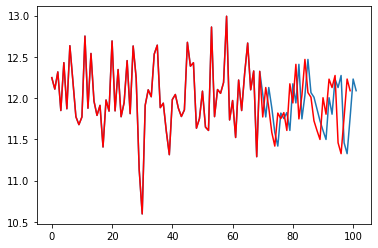

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_model = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=2, include_bias=False)),
    ('std_scale', StandardScaler()),
    ('lin_reg', LinearRegression())
])
poly_model.fit(X_train_cleaned, y_train)
analys_model(poly_model)
plt.plot(y_train[:100])
plt.plot(poly_model.predict(X_train_cleaned[:100]), 'r')

It seems polynomial regression overfitted. With more degrees also it doesnt get better and get very slow. 

# Regularized Linear Models
## TrainRidge Regression

In [70]:
from sklearn.linear_model import Ridge 
ridge_grid = {
    'alpha': np.linspace(0, 1, num=500),
    'solver' : ['cholesky'],
}
ridge_model = Ridge()
ridge_best =  RandomizedSearchCV(ridge_model, ridge_grid, verbose=2, cv=3,n_jobs=-1, 
                              scoring="neg_mean_squared_error").fit(X_train_cleaned, y_train).best_estimator_
ridge_best.fit(X_train_cleaned, y_train)
analys_model(ridge_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Predictions are [12.23973125 12.22326378 12.27616177 12.01084833 12.55468842]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.12178727 0.13379835 0.11790579]
Mean : 0.12449713687472506
Standard Deviation : 0.006765152018545595


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished


## Train Lasso Regression

In [91]:
from sklearn.linear_model import Lasso
lasso_grid = {
    'alpha': np.linspace(0, 1e-3, num=1000),
}
lasso_model =  Lasso()
lasso_best =  RandomizedSearchCV(lasso_model, lasso_grid, verbose=2, cv=3,n_jobs=-1, 
                              scoring="neg_mean_squared_error").fit(X_train_cleaned, y_train).best_estimator_
lasso_best.fit(X_train_cleaned, y_train)
analys_model(lasso_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Predictions are [12.2341857  12.18901652 12.27624524 12.04302313 12.5539652 ]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.11209814 0.12410374 0.11081278]
Mean : 0.11567155107171341
Standard Deviation : 0.005985502443157958


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


In [133]:
from sklearn.linear_model import LassoLars
lasso_lars_grid = {
    'alpha': np.linspace(0, 1e-3, num=10000),
}
lasso_lars_model =  LassoLars()
lasso_lars_best =  RandomizedSearchCV(lasso_lars_model, lasso_lars_grid, verbose=2, cv=3,n_jobs=-1, 
                              scoring="neg_mean_squared_error").fit(X_train_cleaned, y_train).best_estimator_
lasso_lars_best.fit(X_train_cleaned, y_train)
analys_model(lasso_lars_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Predictions are [12.22113953 12.13277982 12.26416869 12.05457469 12.54296461]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.10666863 0.12125741 0.11182948]
Mean : 0.11325183985168817
Standard Deviation : 0.006040168707790156


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=1.069e-03, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 38 iterations, i.e. alpha=3.616e-04, with an active set of 36 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 62 iterations, i.e. alpha=2.065e-04, wit

## Train Elastic Net

In [95]:
from sklearn.linear_model import ElasticNet
elastic_grid = {
    'alpha': np.linspace(0, 1e-2, num=10000),
    'l1_ratio' : np.linspace(0, 1, num=10)
}
elastic_model = ElasticNet()
elastic_best =  RandomizedSearchCV(elastic_model, elastic_grid, verbose=2, cv=3,n_jobs=-1, 
                              scoring="neg_mean_squared_error").fit(X_train_cleaned, y_train).best_estimator_
elastic_best.fit(X_train_cleaned, y_train)
analys_model(elastic_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Predictions are [12.22441118 12.143578   12.26916665 12.05815033 12.54865276]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.10498398 0.11946268 0.10730372]
Mean : 0.11058346080256697
Standard Deviation : 0.006349577403532312


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished


## Train Random Forest Regression

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_cleaned, y_train)
analys_model(rf_model)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predictions are [12.23299403 12.11319466 12.32078619 12.04752701 12.47884562]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.14709896 0.15173181 0.13245973]
Mean : 0.14376349767491317
Standard Deviation : 0.008213696716436281


In [106]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 1, 2, 3, 4, 5, 6, 7]
max_depth = [int(x) for x in np.linspace(1, 110, num = 24)]
# max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()

In [107]:
random_search =  RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                                    n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring="neg_mean_squared_error")
# random_search.fit(X_train_cleaned, y_train)

In [108]:
rf_best = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=34,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1366,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [77]:
# rf_best = random_search.best_estimator_

In [78]:
# rf_best = random_search.best_estimator_
rf_best.fit(X_train_cleaned, y_train)
analys_model(rf_best)

Predictions are [12.23842507 12.07865009 12.29912097 11.96448456 12.49064551]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.13868599 0.14521573 0.12777824]
Mean : 0.137226651765794
Standard Deviation : 0.007193225021242997


# Averaging Usefull models

In [79]:
from sklearn.base import clone, RegressorMixin
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
            model.fit(X, y)
        return self
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)
averaged_model = AveragingModels(models = (elastic_best, lasso_best))
averaged_model.fit(X_train_cleaned, y_train)

AveragingModels(models=(ElasticNet(alpha=0.0031953195319531953, copy_X=True,
                                   fit_intercept=True, l1_ratio=1.0,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                        Lasso(alpha=0.0008758758758758759, copy_X=True,
                              fit_intercept=True, max_iter=1000,
                              normalize=False, positive=False, precompute=False,
                              random_state=None, selection='cyclic', tol=0.0001,
                              warm_start=False)))

In [80]:
analys_model(averaged_model)

Predictions are [12.23012492 12.18857964 12.27358828 12.04051884 12.55188818]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]
Scores : [0.10714277 0.12082164 0.10800795]
Mean : 0.11199078874241407
Standard Deviation : 0.006254339259090499


# Stacking Our Model


In [109]:
from sklearn.model_selection import KFold
from sklearn.base import clone, RegressorMixin
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    def fit(self, X, y=None):
        X = X.values
        y = y.values
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [134]:
stacked_averaged_models = StackingAveragedModels(base_models = [lasso_best, elastic_best, rf_best, lasso_lars_best],
                                                 meta_model = lasso_best)
stacked_averaged_models.fit(X_train_cleaned, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=1.073e-03, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 40 iterations, i.e. alpha=3.686e-04, with an active set of 38 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 55 iterations, i.e. alpha=2.689e-04, with an active set of 53 regressors, and the smallest cholesky pivot eleme

StackingAveragedModels(base_models=[Lasso(alpha=0.0009169169169169169,
                                          copy_X=True, fit_intercept=True,
                                          max_iter=1000, normalize=False,
                                          positive=False, precompute=False,
                                          random_state=None, selection='cyclic',
                                          tol=0.0001, warm_start=False),
                                    ElasticNet(alpha=0.00701970197019702,
                                               copy_X=True, fit_intercept=True,
                                               l1_ratio=0.6666666666666666,
                                               max_iter=1000, normalize=F...
                                              eps=2.220446049250313e-16,
                                              fit_intercept=True, fit_path=True,
                                              max_iter=500, normalize=True,
             

In [135]:
analys_model(stacked_averaged_models)

Predictions are [12.23372316 12.15151548 12.28017444 12.04231738 12.55322057]
Lables are [12.24769911637256, 12.109016442313738, 12.317171167298682, 11.849404844423074, 12.429220196836383]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=1.499e-03, with an active set of 12 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 32 iterations, i.e. alpha=5.148e-04, with an active set of 32 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 60 iterations, i.e. alpha=3.081e-04, with an active set of 60 regressors, and the smallest cholesky pivot eleme

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 31 iterations, i.e. alpha=7.291e-04, with an active set of 29 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=1.855e-03, with an active set of 12 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=6.941e-04, with an active set of 29 regressors, and the smallest cholesky pivot eleme

Scores : [0.10433461 0.11874781 0.10607255]
Mean : 0.10971832312434388
Standard Deviation : 0.0064241106518914855


# Sumbit Test Set

In [136]:
X_test_clean = full_pipeline.transform(X_test)
predictions = stacked_averaged_models.predict(X_test_clean)
final_prediction = pd.DataFrame({'Id': X_test['Id'],
                                'SalePrice': np.expm1(predictions)})

In [137]:
answer_csv = os.path.join(TEST_PATH, 'test_answer.csv')
final_prediction.to_csv(answer_csv, index=False)